In [1]:
import os
import random
import shutil
import sys

import dendropy
from dendropy.interop import raxml

In [3]:
ebola_data = dendropy.DnaCharacterMatrix.get_from_path('trim.fasta', 'fasta')
rx = raxml.RaxmlRunner()
ebola_tree = rx.estimate_tree(ebola_data, ['-m', 'GTRGAMMA', '-N', '10'])
print('RAxML temporary directory: %s' % rx.working_dir_path)
del ebola_data

RAxML temporary directory: /tmp/tmpxi4c8re1


In [9]:
ebola_tree.write_to_path('my_ebola.nex', 'nexus')

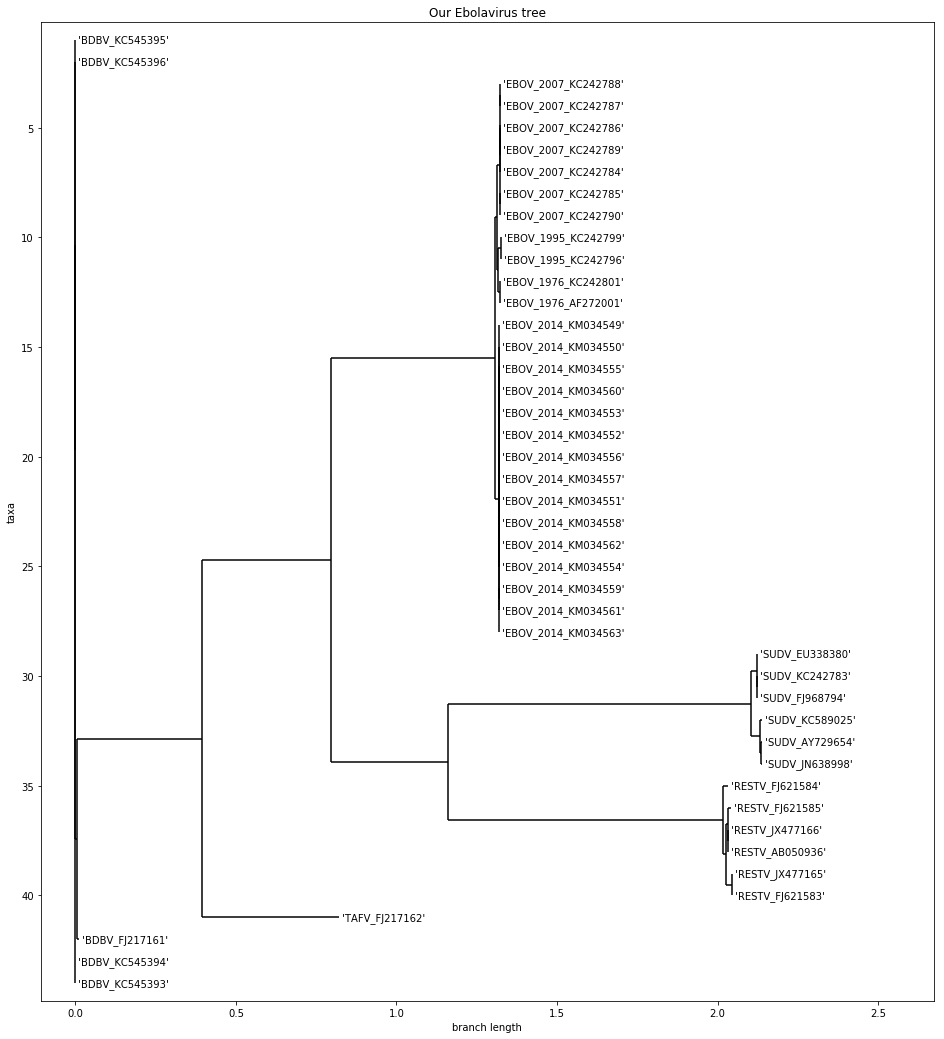

In [10]:
import matplotlib.pyplot as plt
from Bio import Phylo
%matplotlib inline
my_ebola_tree = Phylo.read('my_ebola.nex', 'nexus')
my_ebola_tree.name = 'Our Ebolavirus tree'

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(my_ebola_tree, axes=ax)

## RAxML with Biopython

In [ ]:
# XXX change
from Bio.Phylo.Applications import RaxmlCommandline
raxml_cline = RaxmlCommandline(sequences='trim.fasta',
                               model='GTRGAMMA', name='biopython',
                               num_replicates='10',
                               parsimony_seed=random.randint(0, sys.maxsize),
                               working_dir=os.getcwd() + os.sep + 'bp_rx')
print(raxml_cline)
try:
    os.mkdir('bp_rx')
except OSError:
    shutil.rmtree('bp_rx')
    os.mkdir('bp_rx')
out, err = raxml_cline()

raxmlHPC -m GTRGAMMA -n biopython -p 8564755381145104773 -s trim.fasta -w /home/tiago/Bioinformatics-with-Python-Cookbook-Second-Edition/notebooks/05_Phylo/bp_rx -N 10


In [ ]:
from Bio import Phylo
biopython_tree = Phylo.read('bp_rx/RAxML_bestTree.biopython', 'newick')

In [ ]:
print(biopython_tree)